In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
measurements = base.classes.measurement
station = base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [28]:
#Output visuals for the tables (STATIONS), need to names of columns for analysis
station_table = engine.execute('SELECT * FROM station')
print(station_table.keys())

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [29]:
#station table
station_table.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [37]:
#Output visuals for the tables(MEASUREMENT), need to names of columns for analysis
measurements_table = engine.execute('SELECT * FROM measurement')
print(measurements_table.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [38]:
#measurements table
measurements_table.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
recent_date = (session.query(measurements.date).order_by(measurements.date.desc()).first())
recent_date

('2017-08-23',)

In [40]:
# Designing a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_yr_frm_recent_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_yr_frm_recent_date

datetime.date(2016, 8, 23)

In [45]:
# Perform a query to retrieve the data and precipitation scores
recent_year_precip = (session.query(measurements.date, func.max(measurements.prcp)).filter(func.strftime('%Y-%m-%d',measurements.date) > one_yr_frm_recent_date).group_by(measurements.date).all())
recent_year_precip

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(recent_year_precip, columns = ['date', 'prcp'])
precip_df.set_index('date', inplace = True)
precip_df.head

<bound method NDFrame.head of             prcp
date            
2016-08-24  2.28
2016-08-25  0.21
2016-08-26  0.04
2016-08-27  0.18
2016-08-28  2.07
...          ...
2017-08-19  0.09
2017-08-20  0.01
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[365 rows x 1 columns]>

In [48]:
# Sort the dataframe by date
precip_df.sort_values('date')

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


Text(0.5, 0, 'Date')

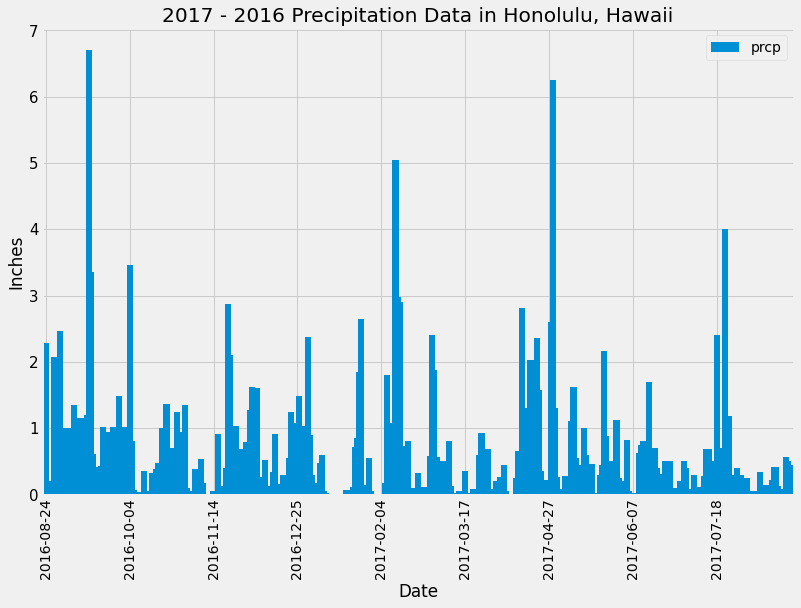

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(kind = 'bar', width = 3, figsize=(12,8))
plt.locator_params(axis = 'x', nbins=9)
precip_plot.tick_params(axis = 'y', labelsize = 15)
plt.title("2017 - 2016 Precipitation Data in Honolulu, Hawaii")
plt.ylabel("Inches")
plt.xlabel("Date")


In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [77]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_query = session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
#which station id has the greatest number of observations?
print("Station USC00519281 has the greatest number of observations with 2772")

Station USC00519281 has the greatest number of observations with 2772


In [86]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max_avg_stationquery = [measurements.station, func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)]

most_act_station = session.query(*min_max_avg_stationquery).filter(measurements.station == 'USC00519281').all()

most_act_station_df = pd.DataFrame(most_act_station, columns = ["station", "min_temp",'max_temp', 'avg_temp' ])
most_act_station_df.set_index('station', inplace=True)
most_act_station_df

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_year_temp =(session.query(measurements.date,(measurements.tobs))
                  .filter(func.strftime(measurements.date) > one_yr_frm_recent_date)
                  .filter(measurements.station =='USC00519281')
                  .all())
recent_year_temp

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [93]:
#save data into dataframe
temp_df = pd.DataFrame(recent_year_temp)
temp_df.set_index('date',inplace=True)

Text(0, 0.5, 'Frequency')

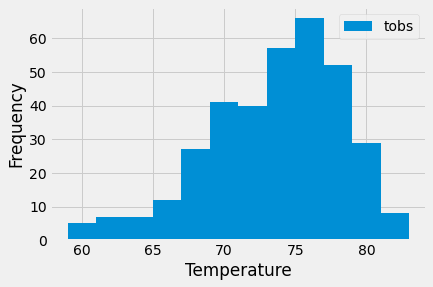

In [96]:
#histogram for dataframe
hist = temp_df.plot.hist(bins=12)
hist.grid(True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [97]:
# Close Session
session.close()